In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt

from pydynamics.process_models import FOPDT

In [2]:
data = pd.read_excel("VIP_benchtop_ts_time_filt.xlsx")

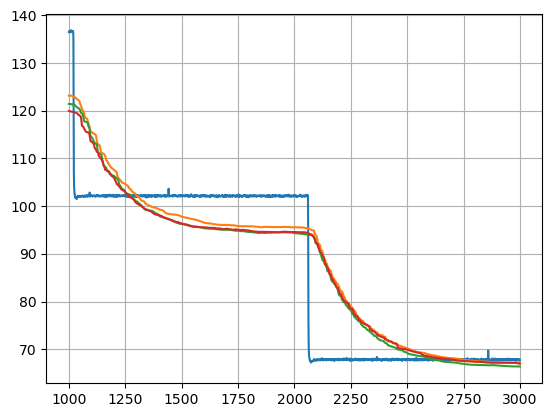

In [3]:
data.head()
d = data.iloc[1000:3000, :]
plt.plot(d["Gas2 O2"])
plt.plot(d["Oxy2_PO2"])
plt.plot(d["Oxy3_PO2"])
plt.plot(d["Oxy4_PO2"])
plt.grid()

[0.81869651 3.05390012 0.3212478 ] 0.9997274685086844
[0.80335836 3.0185627  0.36764891] 0.9998076487164451
[0.77239681 3.17517971 0.36032508] 0.999159770140525


<Figure size 640x480 with 0 Axes>

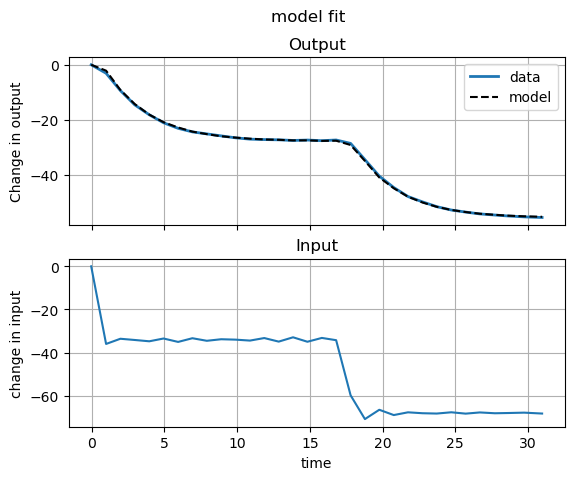

<Figure size 640x480 with 0 Axes>

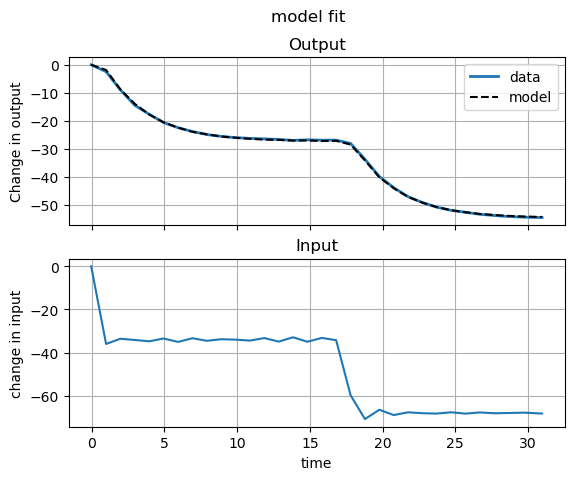

<Figure size 640x480 with 0 Axes>

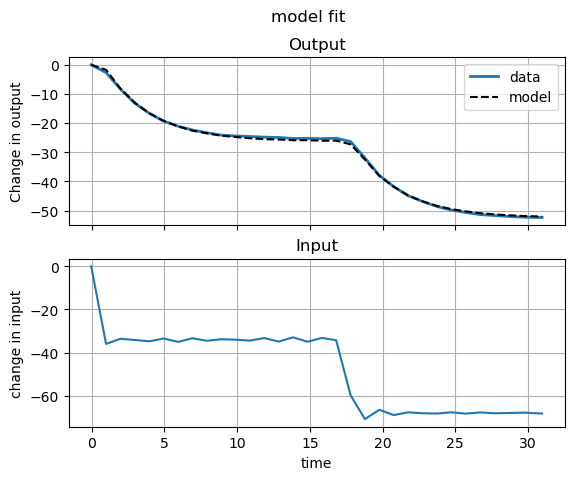

In [4]:
#Generate the input vector
u = d["Gas2 O2"].to_numpy()

# For each Oxy-probe, generate a column string
vars = [f"Oxy{i}_PO2" for i in range(2,5)]
for var in vars:
    y = d[var].to_numpy()
    ts = np.arange(len(y))
    df=60

    td = signal.decimate(ts, df)/df
    yd = signal.decimate(y, df)
    ud = signal.decimate(u, df)

    fom = FOPDT(td, yd - yd[0], ud-ud[0])
    res = fom.fit_model(plot_result=True)
    print(res["soln"], res["R2"])

[ 0.81954761 19.36779173  2.18531043] 0.9997720140540888


<Figure size 640x480 with 0 Axes>

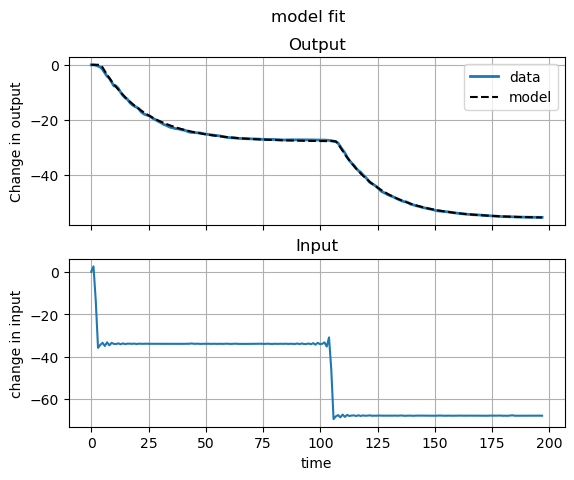

In [9]:
y = d["Oxy2_PO2"].to_numpy()
ts = np.arange(len(y))
df = 10

td = signal.decimate(ts, df)/df
yd = signal.decimate(y, df)
ud = signal.decimate(u, df)

fom = FOPDT(td, yd - yd[0], ud-ud[0])
res = fom.fit_model(plot_result=True)
print(res["soln"], res["R2"])

<Figure size 640x480 with 0 Axes>

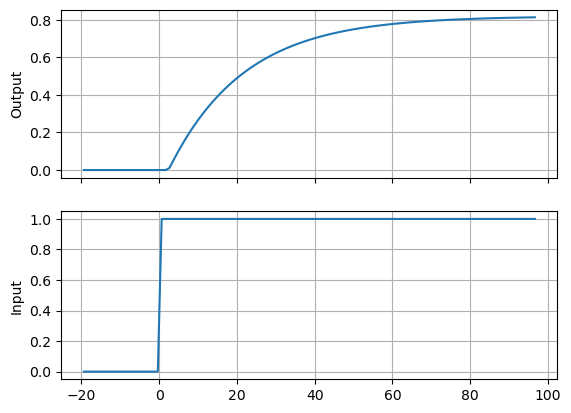

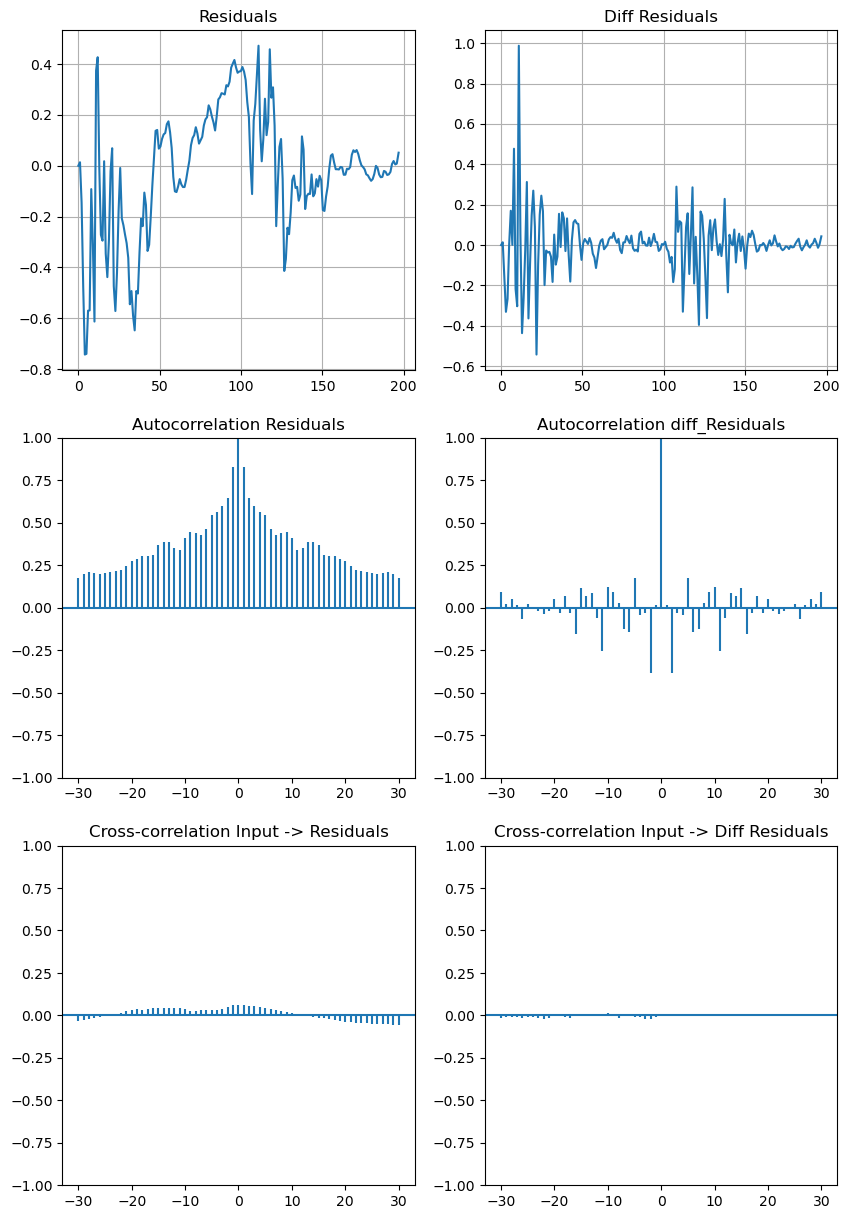

In [10]:
fom.step()
fom.plot_diagnostics()